In [1]:
import numpy as np
from vowpalwabbit import pyvw
from sklearn import datasets
from sklearn.cross_validation import train_test_split
from vowpalwabbit.sklearn_vw import VWClassifier
import re
import itertools
from operator import itemgetter
from collections import Counter
import matplotlib.pyplot as plt
import pickle
import pandas as pd

/home/nehal/.virtenvs/odc-challenge/local/lib/python2.7/site-packages/matplotlib/font_manager.py:273: UserWarning: Matplotlib is building the font cache using fc-list. This may take a moment.
  warnings.warn('Matplotlib is building the font cache using fc-list. This may take a moment.')


In [2]:
%matplotlib inline

In [3]:
DIR = "./data/"

In [ ]:
X, y = datasets.make_hastie_10_2(n_samples=10000, random_state=1)
X = X.astype(np.float32)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=256)
model = VWClassifier()
model.fit(X_train, y_train)
model.score(X_train, y_train)
model.score(X_test, y_test)

In [ ]:
import re
import ast
from collections import defaultdict
feature_dict = defaultdict(list)
regex = r"\(\d+, \d+.[\de-]+\)"

In [ ]:
vw_compatible_file = open("./vw_compatible_file.vw", 'wb')
with open(DIR + 'total_spend.txt', 'r') as train_data:
    for line in itertools.islice(train_data, 100000, 600000):
        el = eval(line)
        vw_compatible_file.write(str(el[1]) + " '" + str(el[0]) + " | ")
        for item in el[2][1]:
            vw_compatible_file.write(str(item[0]) + ":" + str(item[1]) + " ")
        vw_compatible_file.write("\n")
vw_compatible_file.close()

In [8]:
total_spend_df = pd.read_csv(DIR + 'total_spend.txt', sep=",", header = None)

In [32]:
len(total_spend_df.index)

12440009

In [10]:
total_spend_df.columns = ["Household ID", "Total Expenditure"]

In [38]:
common_50 = Counter(total_spend_df["Total Expenditure"]).most_common(50)

In [40]:
common_50_x = []
common_50_y = []
for item in common_50:
    common_50_x.append(item[0])
    common_50_y.append(item[1])

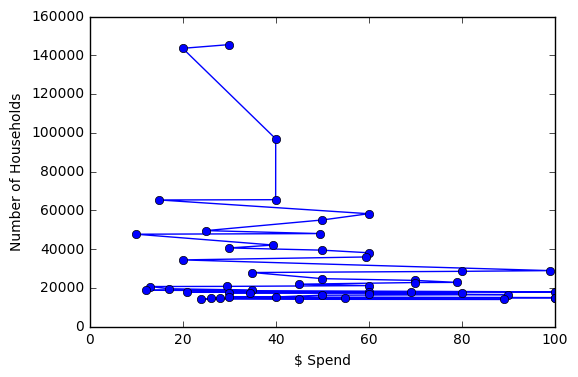

In [50]:
plt.plot(common_50_x, common_50_y, '-o')
plt.xlabel("$ Spend")
plt.ylabel("Number of Households")

In [19]:
cutoff_total_spend_df = total_spend_df[(total_spend_df['Total Expenditure'] < 500) & total_spend_df['Total Expenditure'] > 0]

In [29]:
upper_limit_total_spend_df = total_spend_df[(total_spend_df["Total Expenditure"] > 500) & (total_spend_df["Total Expenditure"] < 10000)]

In [20]:
cutoff_total_spend_df

,Household ID,Total Expenditure
0,2964841,126.00
1,31389918,365.88
3,31390092,344.25
4,31390102,60.00
5,31390134,179.00
7,31390210,229.99
9,31390279,179.94
10,31390294,14.99
11,31390306,94.49
13,2964853,216.23


In [27]:
upper_limit_total_spend_df

,Household ID,Total Expenditure
2,31390077,2138.49
6,31390208,5831.89
8,31390260,1472.04
12,2964852,2420.45
14,31390343,659.87
17,31390372,593.85
26,31390605,4902.59
34,485597,594.95
35,31390877,1465.11
38,31390923,3145.63


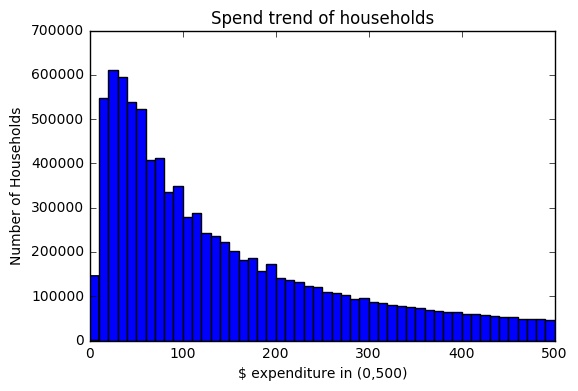

In [30]:
plt.hist(cutoff_total_spend_df["Total Expenditure"], bins=50)
plt.xlabel("$ expenditure in (0,500)")
plt.ylabel("Number of Households")
plt.title("Spend trend of households")

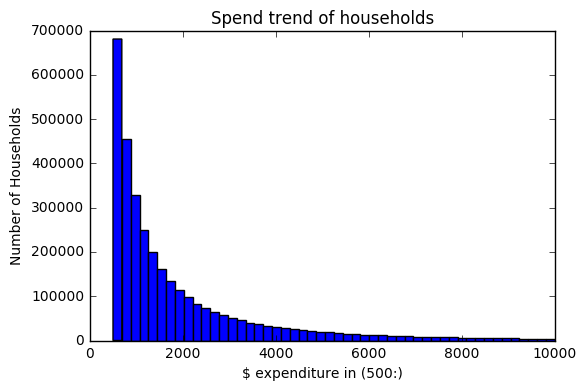

In [31]:
plt.hist(upper_limit_total_spend_df["Total Expenditure"], bins=50)
plt.xlabel("$ expenditure in (500:)")
plt.ylabel("Number of Households")
plt.title("Spend trend of households")

In [86]:
import re
import ast
from collections import defaultdict
feature_dict = defaultdict(list)
regex = r"\(\d+, \d+.[\de-]+\)"

In [88]:
with open(DIR + "train.txt", 'rb') as f:
    for line in itertools.islice(f, 0, 100000):
        features_tuples = re.findall(regex, line.decode("utf-8"), flags=0)
        store_features = [ast.literal_eval(i) for i in features_tuples]
        for pair in store_features:
            feature_dict[pair[0]].append(pair[1])

In [108]:
# del feature_dict

In [92]:
# len(feature_dict)
with open('feature_dict_100000_hp.pickle', 'wb') as handle:
  pickle.dump(feature_dict, handle, protocol=pickle.HIGHEST_PROTOCOL)